In [44]:
import tensorflow as tf

In [2]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)

In [9]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, features)

sequence_of_indices = tf.constant([[[0], [5], [500]]])
sequence_of_embeddings = embedding_layer(sequence_of_indices)
sequence_of_embeddings

<tf.Tensor: shape=(1, 3, 1, 16), dtype=float32, numpy=
array([[[[-0.01680819,  0.03279096, -0.0108939 ,  0.02437469,
           0.03179249, -0.00486388,  0.00086085, -0.01517643,
          -0.02761002,  0.04067488, -0.00844397,  0.0277053 ,
          -0.02861062,  0.01162422,  0.0125448 , -0.04347588]],

        [[ 0.04006643,  0.02746521, -0.00271063, -0.02567539,
          -0.02279323, -0.01081013,  0.03305372, -0.03371685,
          -0.004366  , -0.044827  ,  0.03687176,  0.04177496,
          -0.04622513, -0.02125409, -0.0012335 , -0.03994273]],

        [[ 0.00536465, -0.00861949, -0.03582831,  0.04902338,
           0.01943802,  0.02442353, -0.02214667,  0.0380579 ,
          -0.01009529, -0.04276399, -0.00100614, -0.00449928,
           0.01955717, -0.01769599, -0.0131911 , -0.02903906]]]],
      dtype=float32)>

In [11]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0]

array([[-0.01680819,  0.03279096, -0.0108939 , ...,  0.01162422,
         0.0125448 , -0.04347588],
       [ 0.00677701, -0.00945021, -0.03777818, ...,  0.03052977,
        -0.01130687, -0.00621187],
       [-0.0171155 ,  0.04361825, -0.0404637 , ..., -0.04085638,
         0.0115751 , -0.00895105],
       ...,
       [ 0.00045989,  0.03563919, -0.02178601, ..., -0.03201826,
         0.00532783,  0.04177476],
       [ 0.00016996, -0.00970531,  0.02114893, ..., -0.03580118,
         0.02412165, -0.04397111],
       [ 0.00536465, -0.00861949, -0.03582831, ..., -0.01769599,
        -0.0131911 , -0.02903906]], dtype=float32)

In [12]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14, :]

array([-0.04666999, -0.04975634,  0.0322131 , -0.02994808, -0.04074536,
        0.02910599,  0.02924073,  0.03494828,  0.01926896,  0.007568  ,
       -0.0063517 , -0.0111108 , -0.0203535 ,  0.03664101,  0.04556472,
        0.02766057], dtype=float32)

### Create and apply an Embedding layer that uses mask_zero=True

In [14]:
# Create a layer that uses the mask_zero kwarg

masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [16]:
# Apply this layer to the sequence and see the _keras_mask property

masked_sequence_of_embeddings = masking_embedding_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: shape=(1, 3, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True]]])>

### The Embedding Projector

In [19]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb
    
    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                         num_words=num_words,
                                                         skip_top=0,
                                                         maxlen=maxlen,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=index_from)
    
    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [20]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/mach1ne/anaconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/mach1ne/anaconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

In [22]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(path='imdb_word_index.json')
    
    imdb_word_index = {key: value + index_from for
                      key, value in imdb_word_index.items() if value + index_from < num_words}
    return imdb_word_index

In [23]:
# Get the word index

imdb_word_index = get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [24]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}

In [25]:
# View the first dataset example sentence

[inv_imdb_word_index[index] for index in x_train[100] if index > 2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

### Build an Embedding layer into a model

In [26]:
# Get the maximum index value

max_index_value = max(imdb_word_index.values())

In [28]:
# specify an embedding dimension

embedding_dim = 16

In [31]:
# Build  a model using Sequential:
#   1. Embedding layer
#   2. GlobalAveragePooling1D
#   3. Dense

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [35]:
# Functional API refresher: use the Model to build the same model

review_sequence = tf.keras.Input((None,))
embedding_sequence = tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim)(review_sequence)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
positive_probability = tf.keras.layers.Dense(1, activation='sigmoid')(average_embedding)

model = tf.keras.Model(inputs=review_sequence, outputs=positive_probability)

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_7 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
_________________________________________________________________


### Compile, train, and evaluate the model

In [37]:
# Compile the model with a binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [39]:
# Train the model using .fit(), saving its history

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)

Epoch 1/5
782/782 [==============================] - 3s 4ms/step - loss: 0.4897 - accuracy: 0.8348 - val_loss: 0.4760 - val_accuracy: 0.8156
Epoch 2/5
782/782 [==============================] - 3s 4ms/step - loss: 0.4516 - accuracy: 0.8497 - val_loss: 0.4432 - val_accuracy: 0.8359
Epoch 3/5
782/782 [==============================] - 3s 4ms/step - loss: 0.4187 - accuracy: 0.8628 - val_loss: 0.4173 - val_accuracy: 0.8484
Epoch 4/5
782/782 [==============================] - 3s 4ms/step - loss: 0.3905 - accuracy: 0.8692 - val_loss: 0.3928 - val_accuracy: 0.8578
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.3668 - accuracy: 0.8768 - val_loss: 0.3733 - val_accuracy: 0.8672


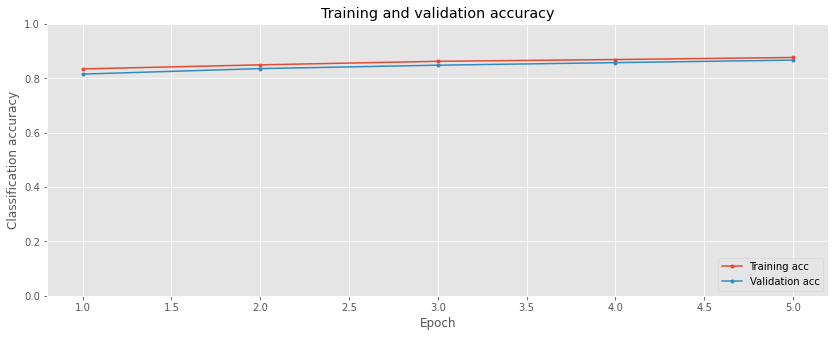

In [43]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0,1);

### The Tensorflow embedding projector

In [45]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]

In [46]:
# Save the word embeddings to tsv files
# Two files:
#     one contains the embedding labels (meta.tsv)
#     one contains the embeddings (vecs.tsv)

In [47]:
import io
from os import path

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k!=0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k+=1

out_v.close()
out_m.close()

https://projector.tensorflow.org/